In [1]:

pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [3]:
boston_datasets = load_boston()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [4]:
type(boston_datasets)

sklearn.utils._bunch.Bunch

In [5]:
boston_datasets

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dir(boston_datasets)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

print(boston_datasets.DESCR)

## Data points and features

In [7]:
type(boston_datasets.data)

numpy.ndarray

In [8]:
boston_datasets.data.shape

(506, 13)

In [9]:
boston_datasets.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration woth Pandas dataframes

In [10]:
data = pd.DataFrame(data=boston_datasets.data, columns=boston_datasets.feature_names)

In [11]:
data['PRICE'] = boston_datasets.target

In [12]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [13]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [15]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

## Visualising Data - Histogram, Distributions and Bar Charts

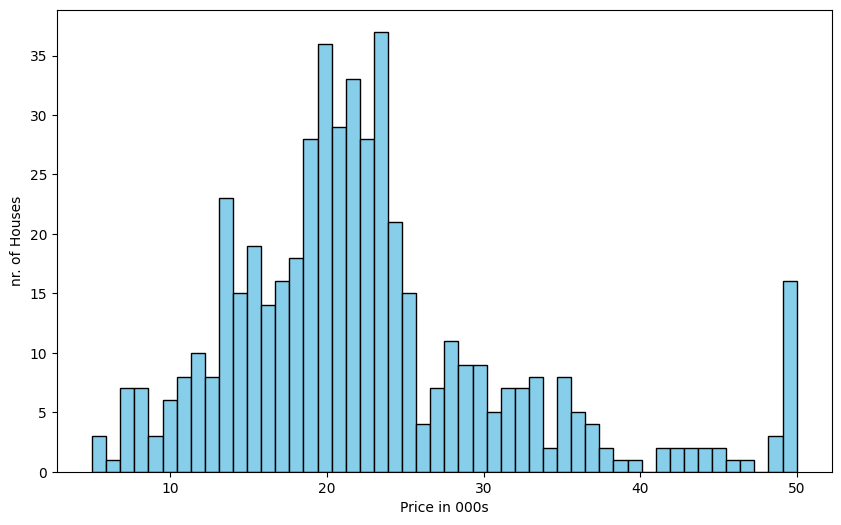

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color="skyblue")
plt.xlabel('Price in 000s')
plt.ylabel('nr. of Houses')
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8376\1370224250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], bins=50, color='darkblue')


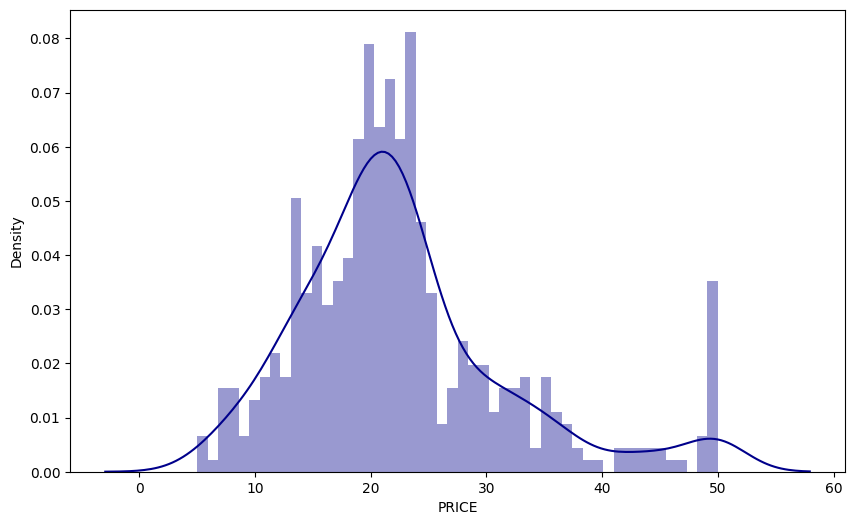

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, color='darkblue')
plt.show()

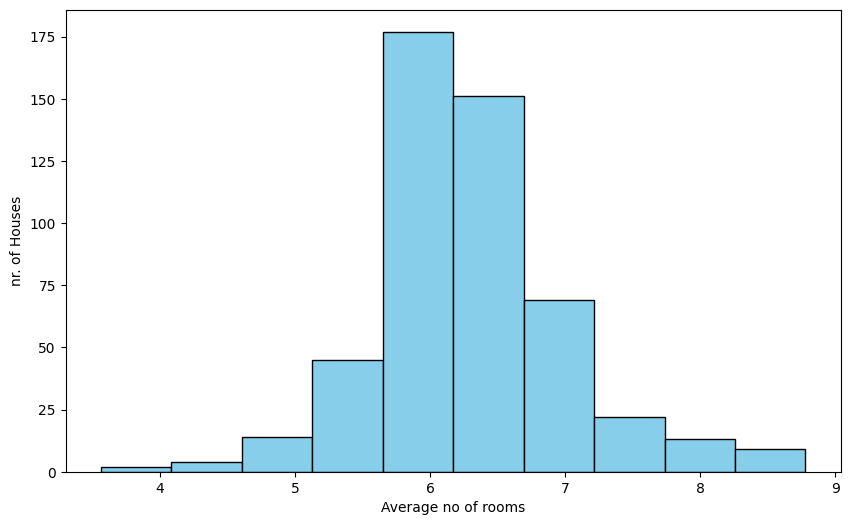

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color="skyblue")
plt.xlabel('Average no of rooms')
plt.ylabel('nr. of Houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351779

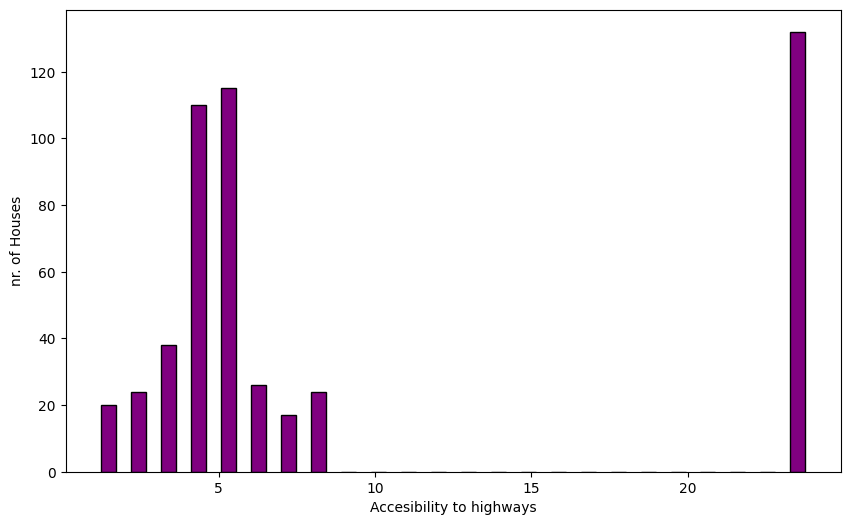

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', color="purple", rwidth=0.5)
plt.xlabel('Accesibility to highways')
plt.ylabel('nr. of Houses')
plt.show()

In [21]:
data['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

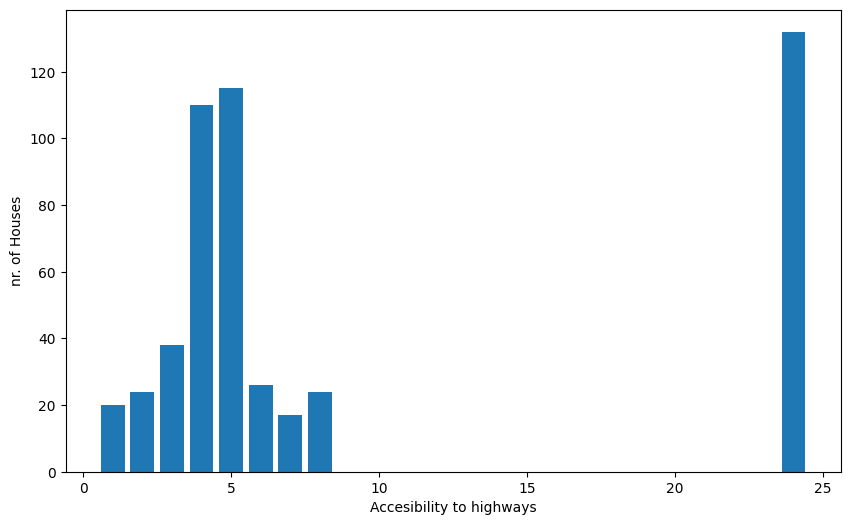

In [22]:
frequency = data['RAD'].value_counts()
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(10,6))

plt.xlabel('Accesibility to highways')
plt.ylabel('nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [23]:
data['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

## Descriptive Statistics

In [24]:
data['PRICE'].min()

5.0

In [25]:
data['PRICE'].max()

50.0

In [26]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [27]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [29]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [30]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho_{xy}=corr{xy}$$
## $$ -1.0 \leq \rho_{xy} \leq +1.0$$

In [31]:
data['PRICE'].corr(data['RM'])

0.6953599470715396

In [32]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [33]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [34]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

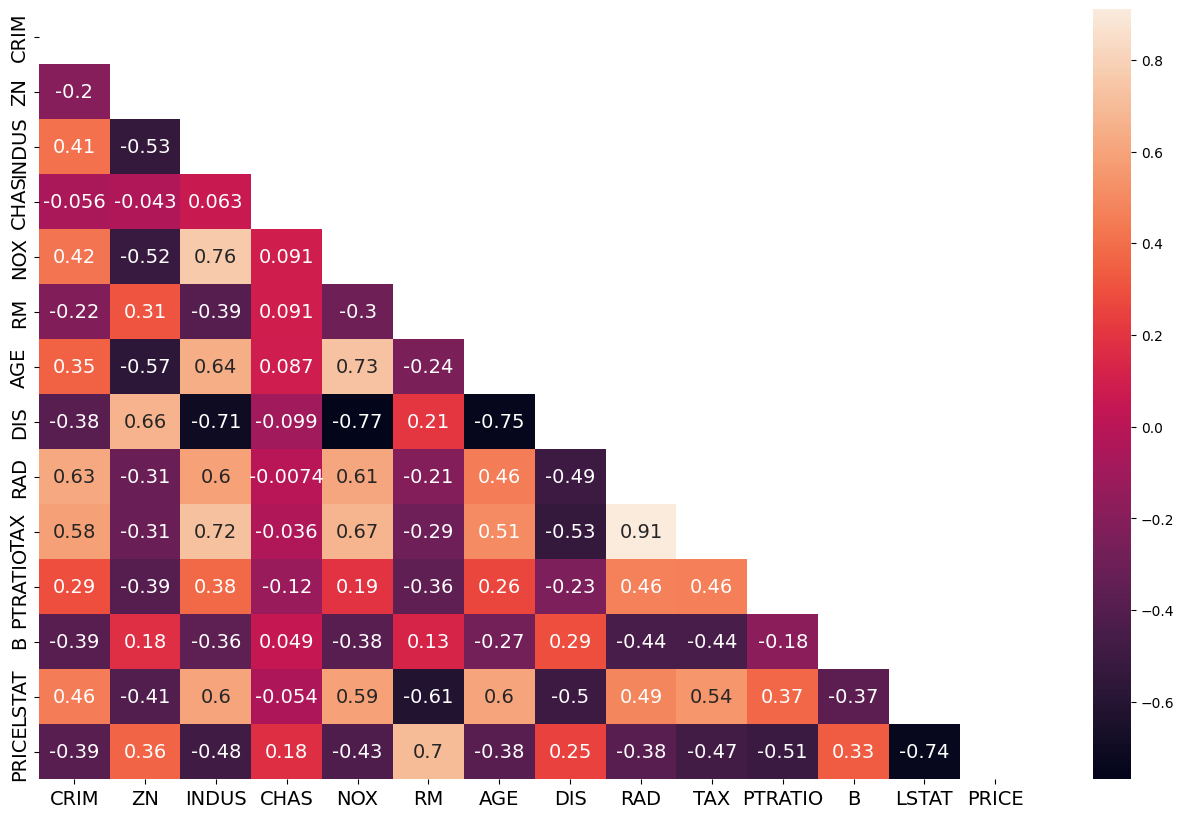

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask,annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

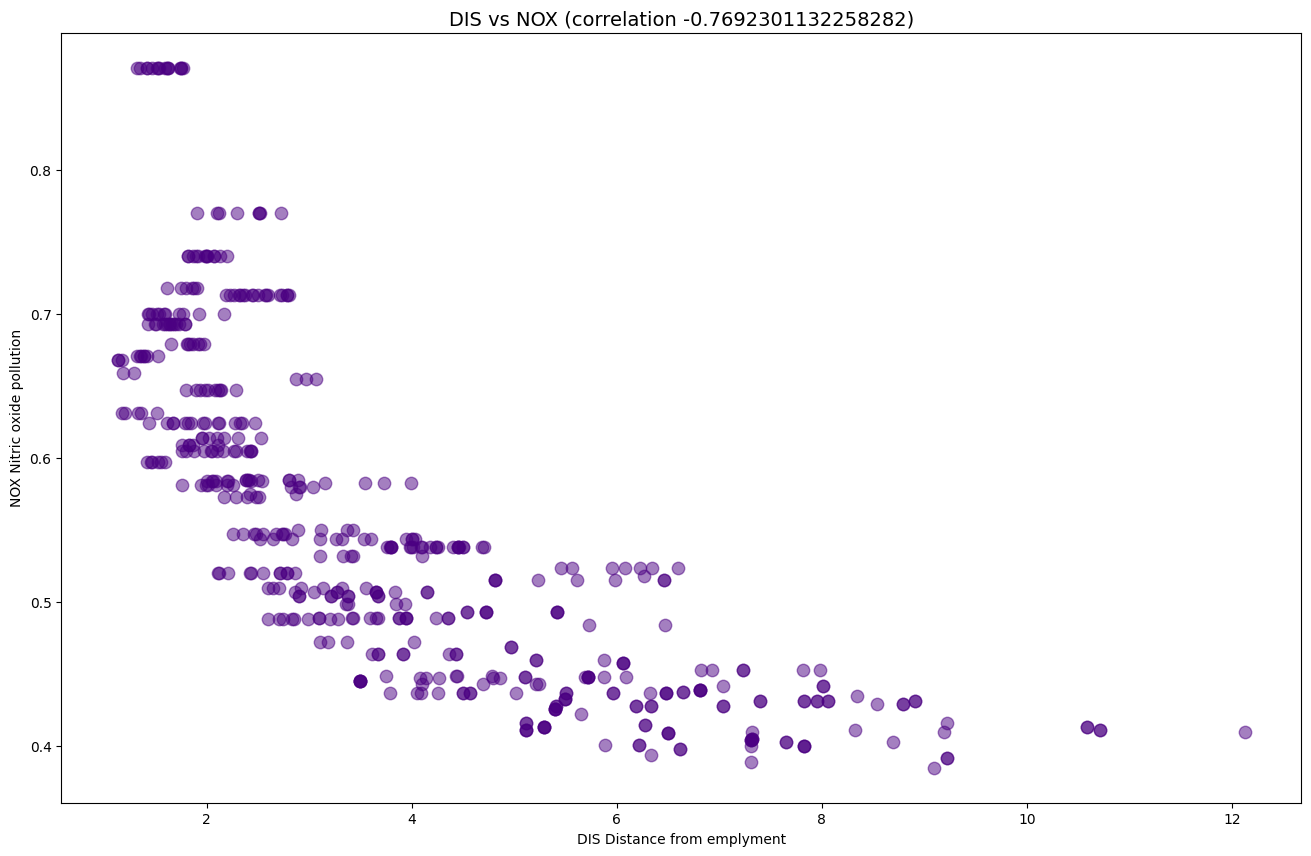

In [36]:
nox_dis_corr = data['NOX'].corr(data['DIS'])
plt.figure(figsize=(16,10))



plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.5, s=80, color='indigo')

plt.title(f'DIS vs NOX (correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS Distance from emplyment')
plt.ylabel('NOX Nitric oxide pollution')
plt.show()

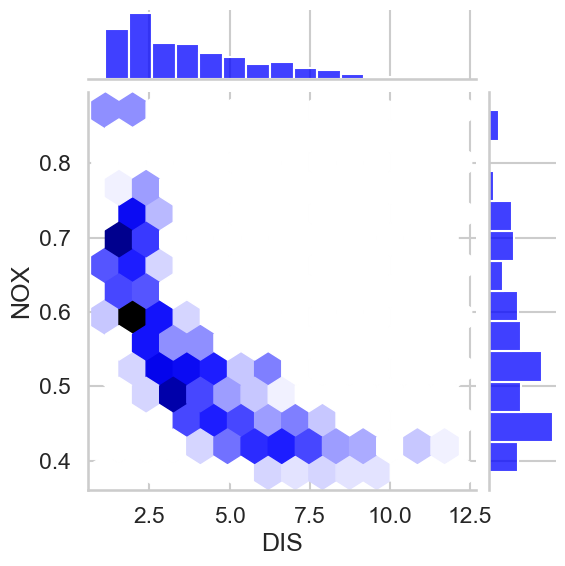

In [37]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', color='blue')
plt.show()

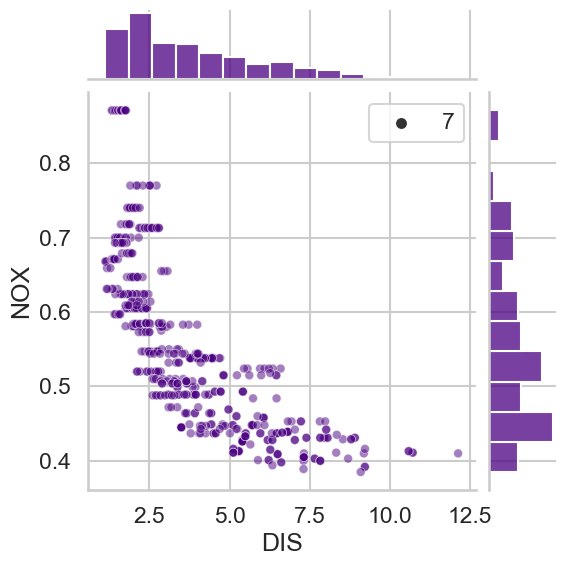

In [38]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

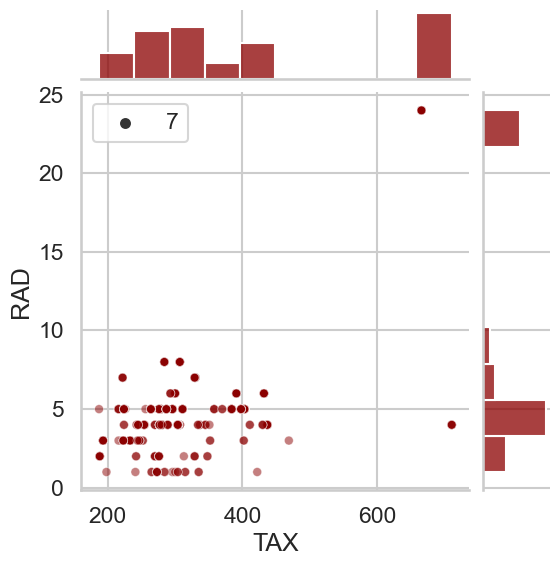

In [39]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], size=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


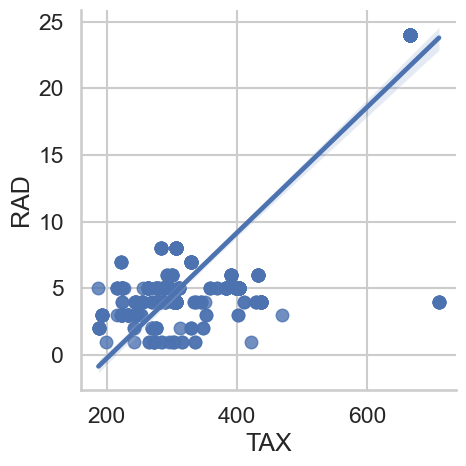

In [40]:
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

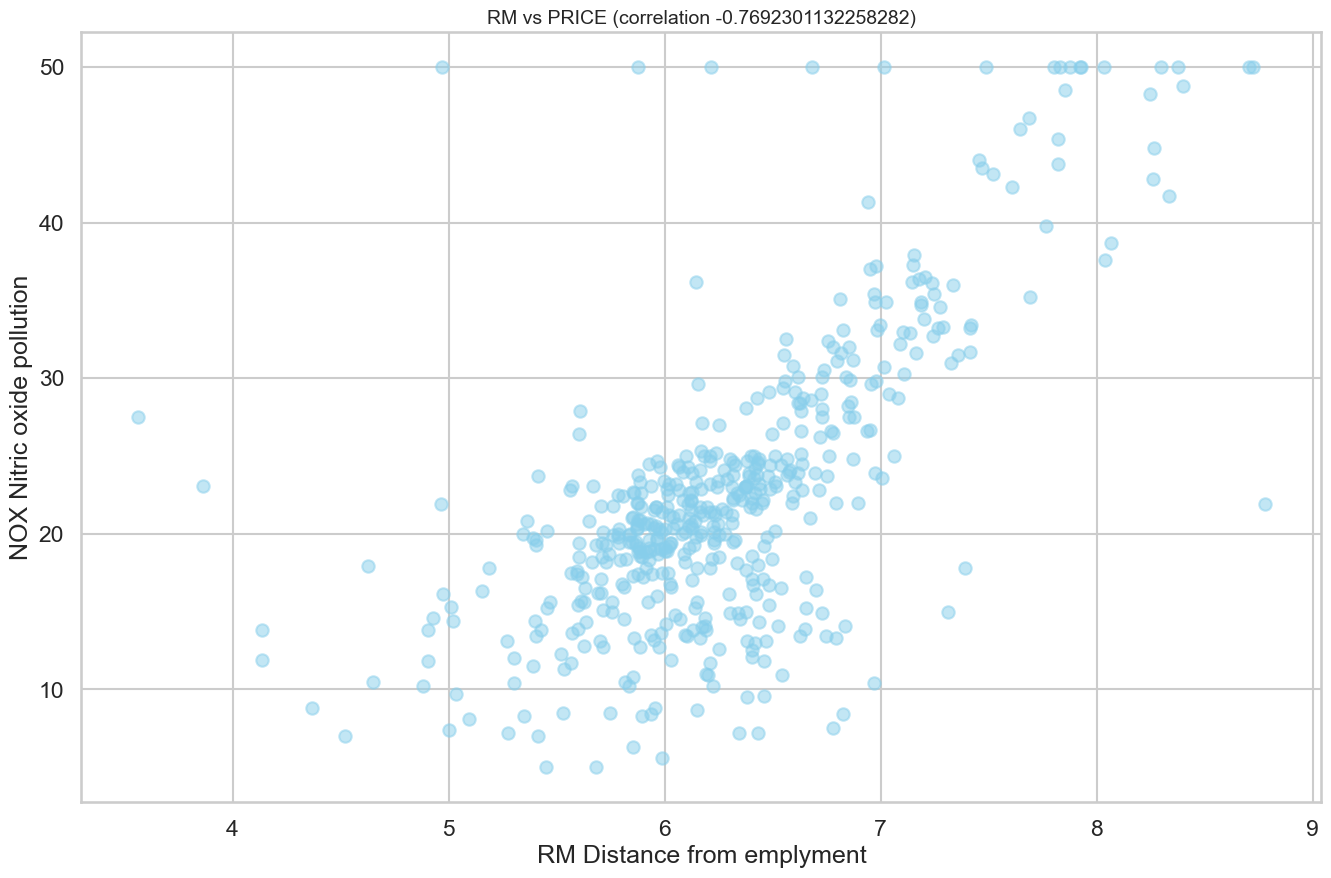

In [41]:
rm_tgt_corr = data['RM'].corr(data['PRICE'])
plt.figure(figsize=(16,10))



plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.5, s=80, color='skyblue')

plt.title(f'RM vs PRICE (correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('RM Distance from emplyment')
plt.ylabel('NOX Nitric oxide pollution')
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


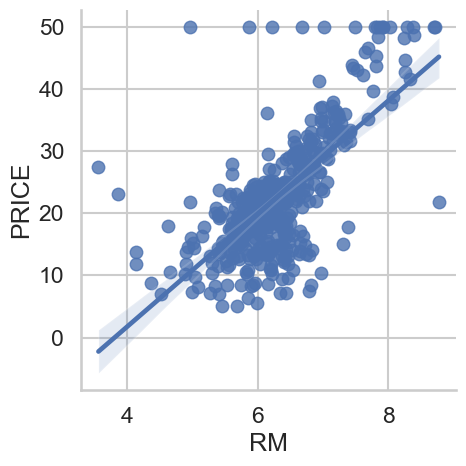

In [42]:
sns.lmplot(x='RM', y='PRICE', data=data)
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


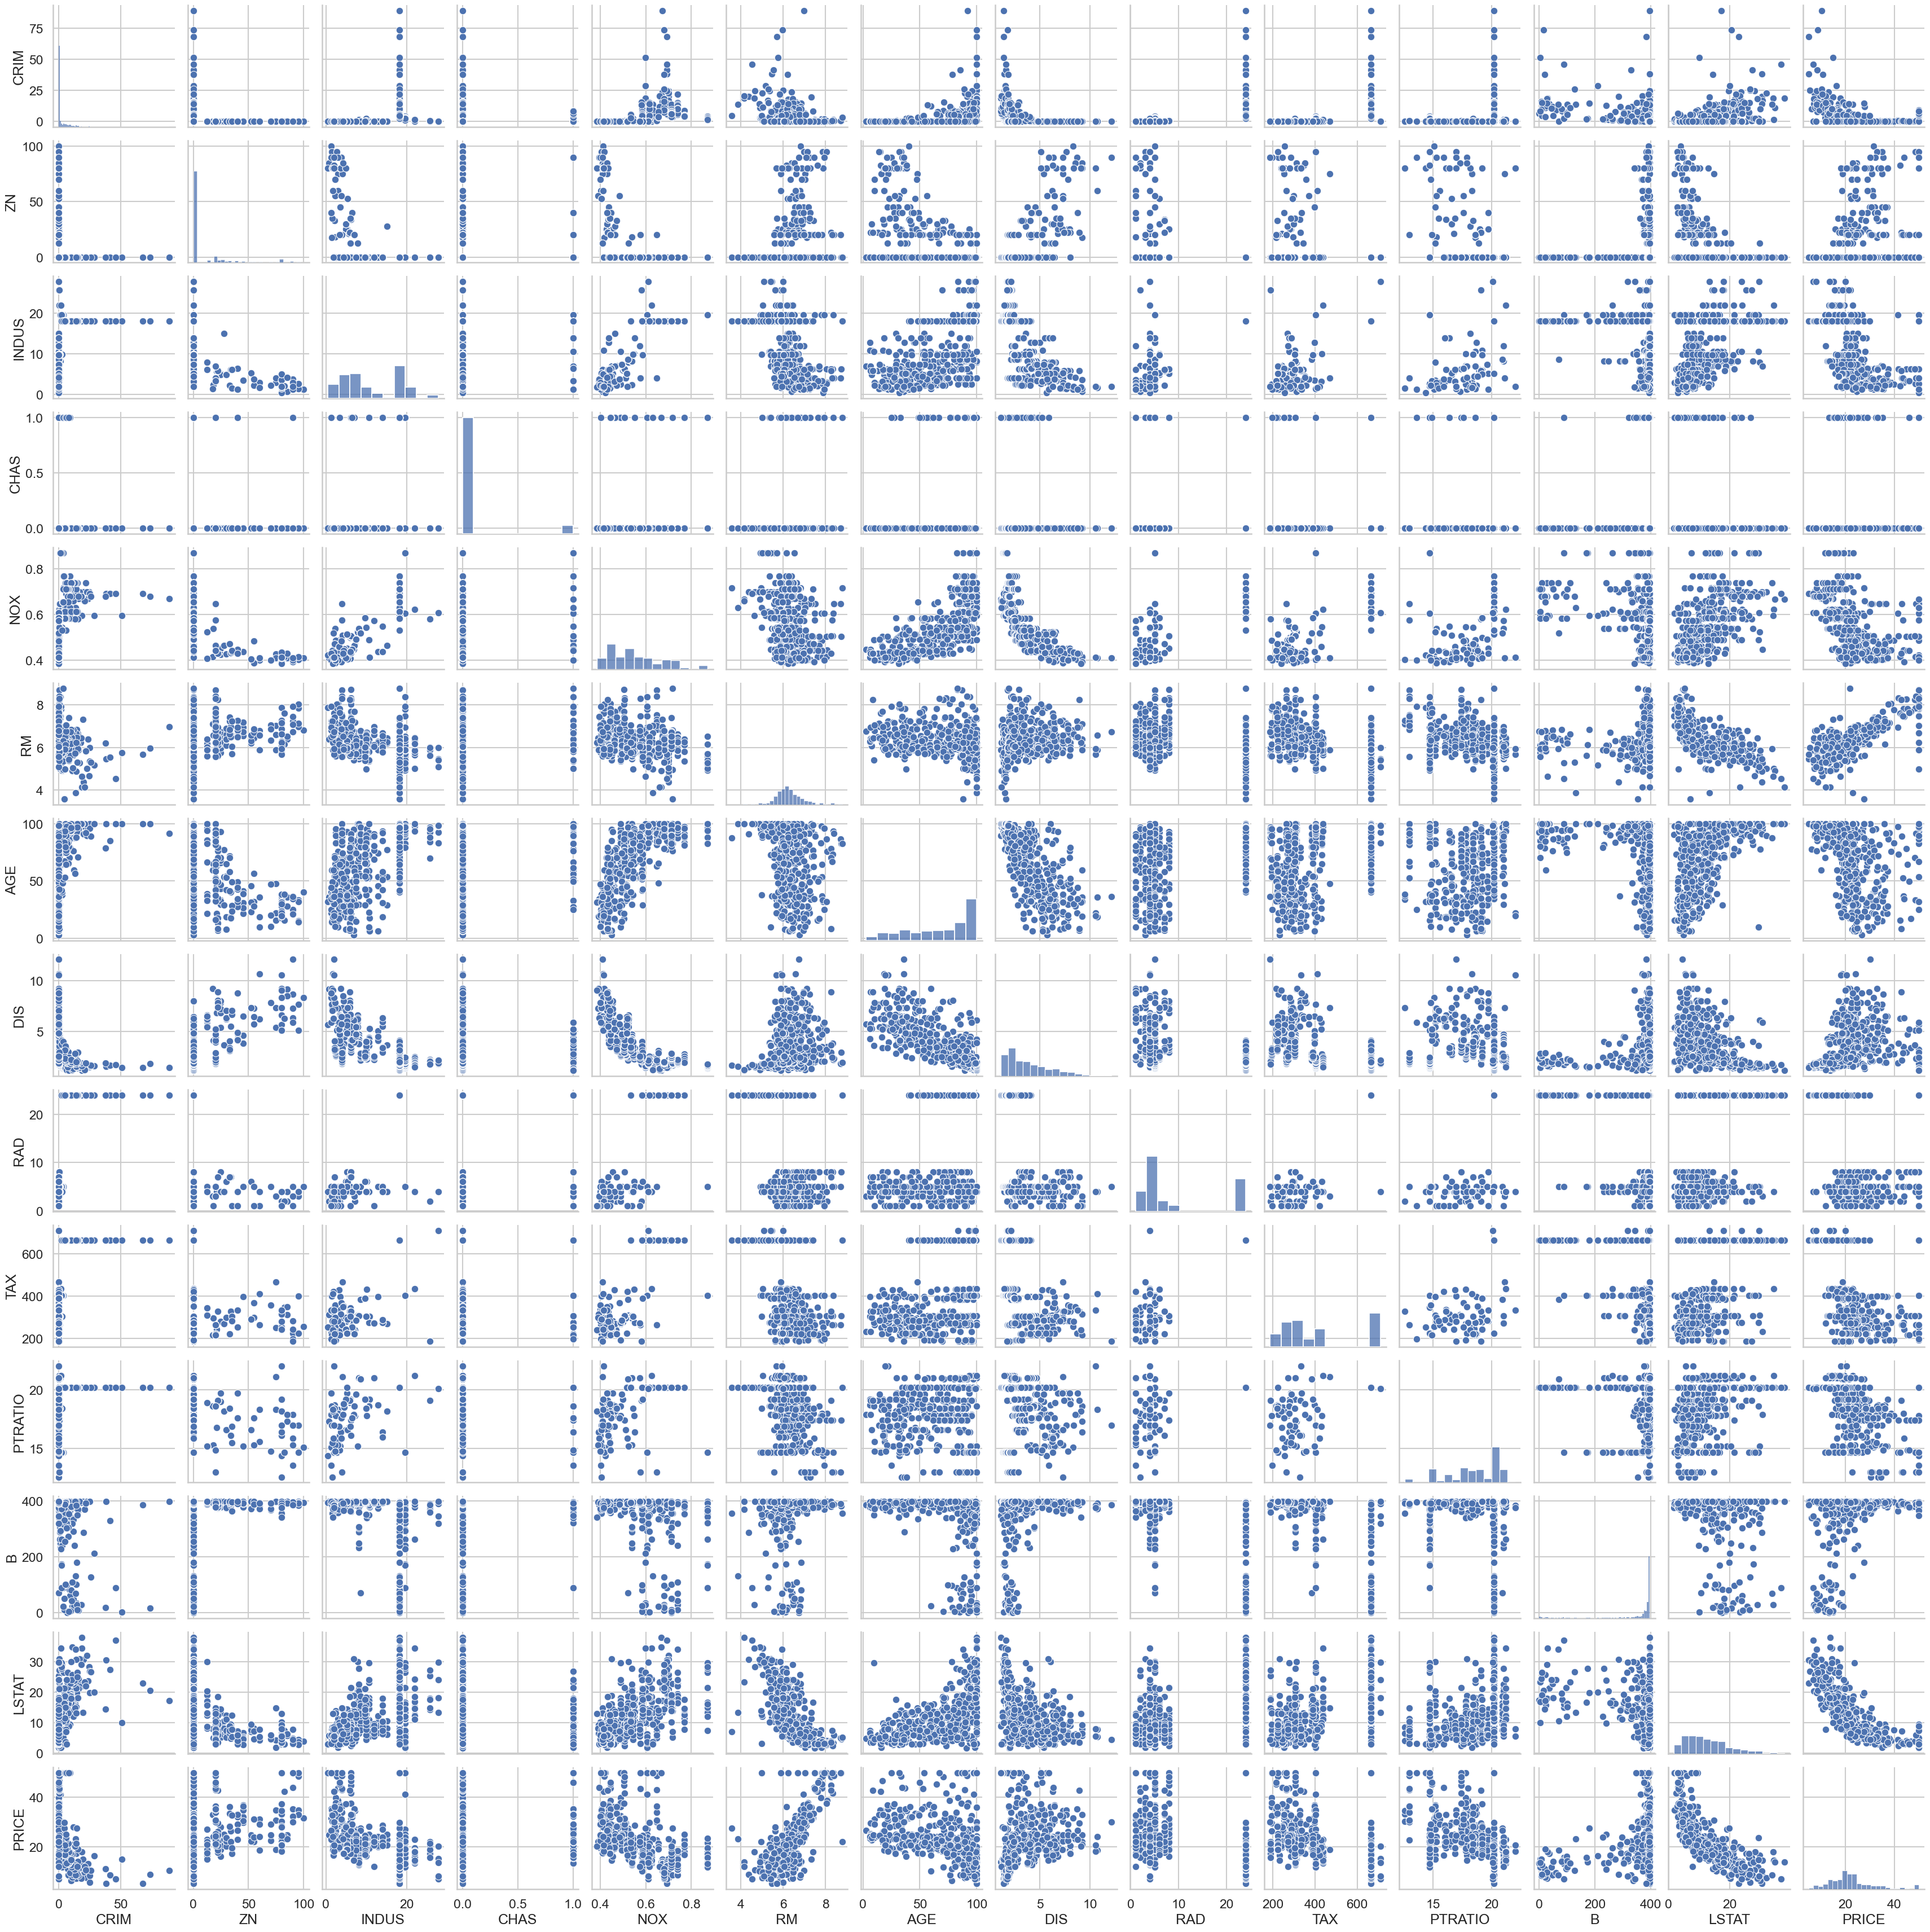

CPU times: total: 26.4 s
Wall time: 37.3 s


In [43]:
%%time
sns.pairplot(data)
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


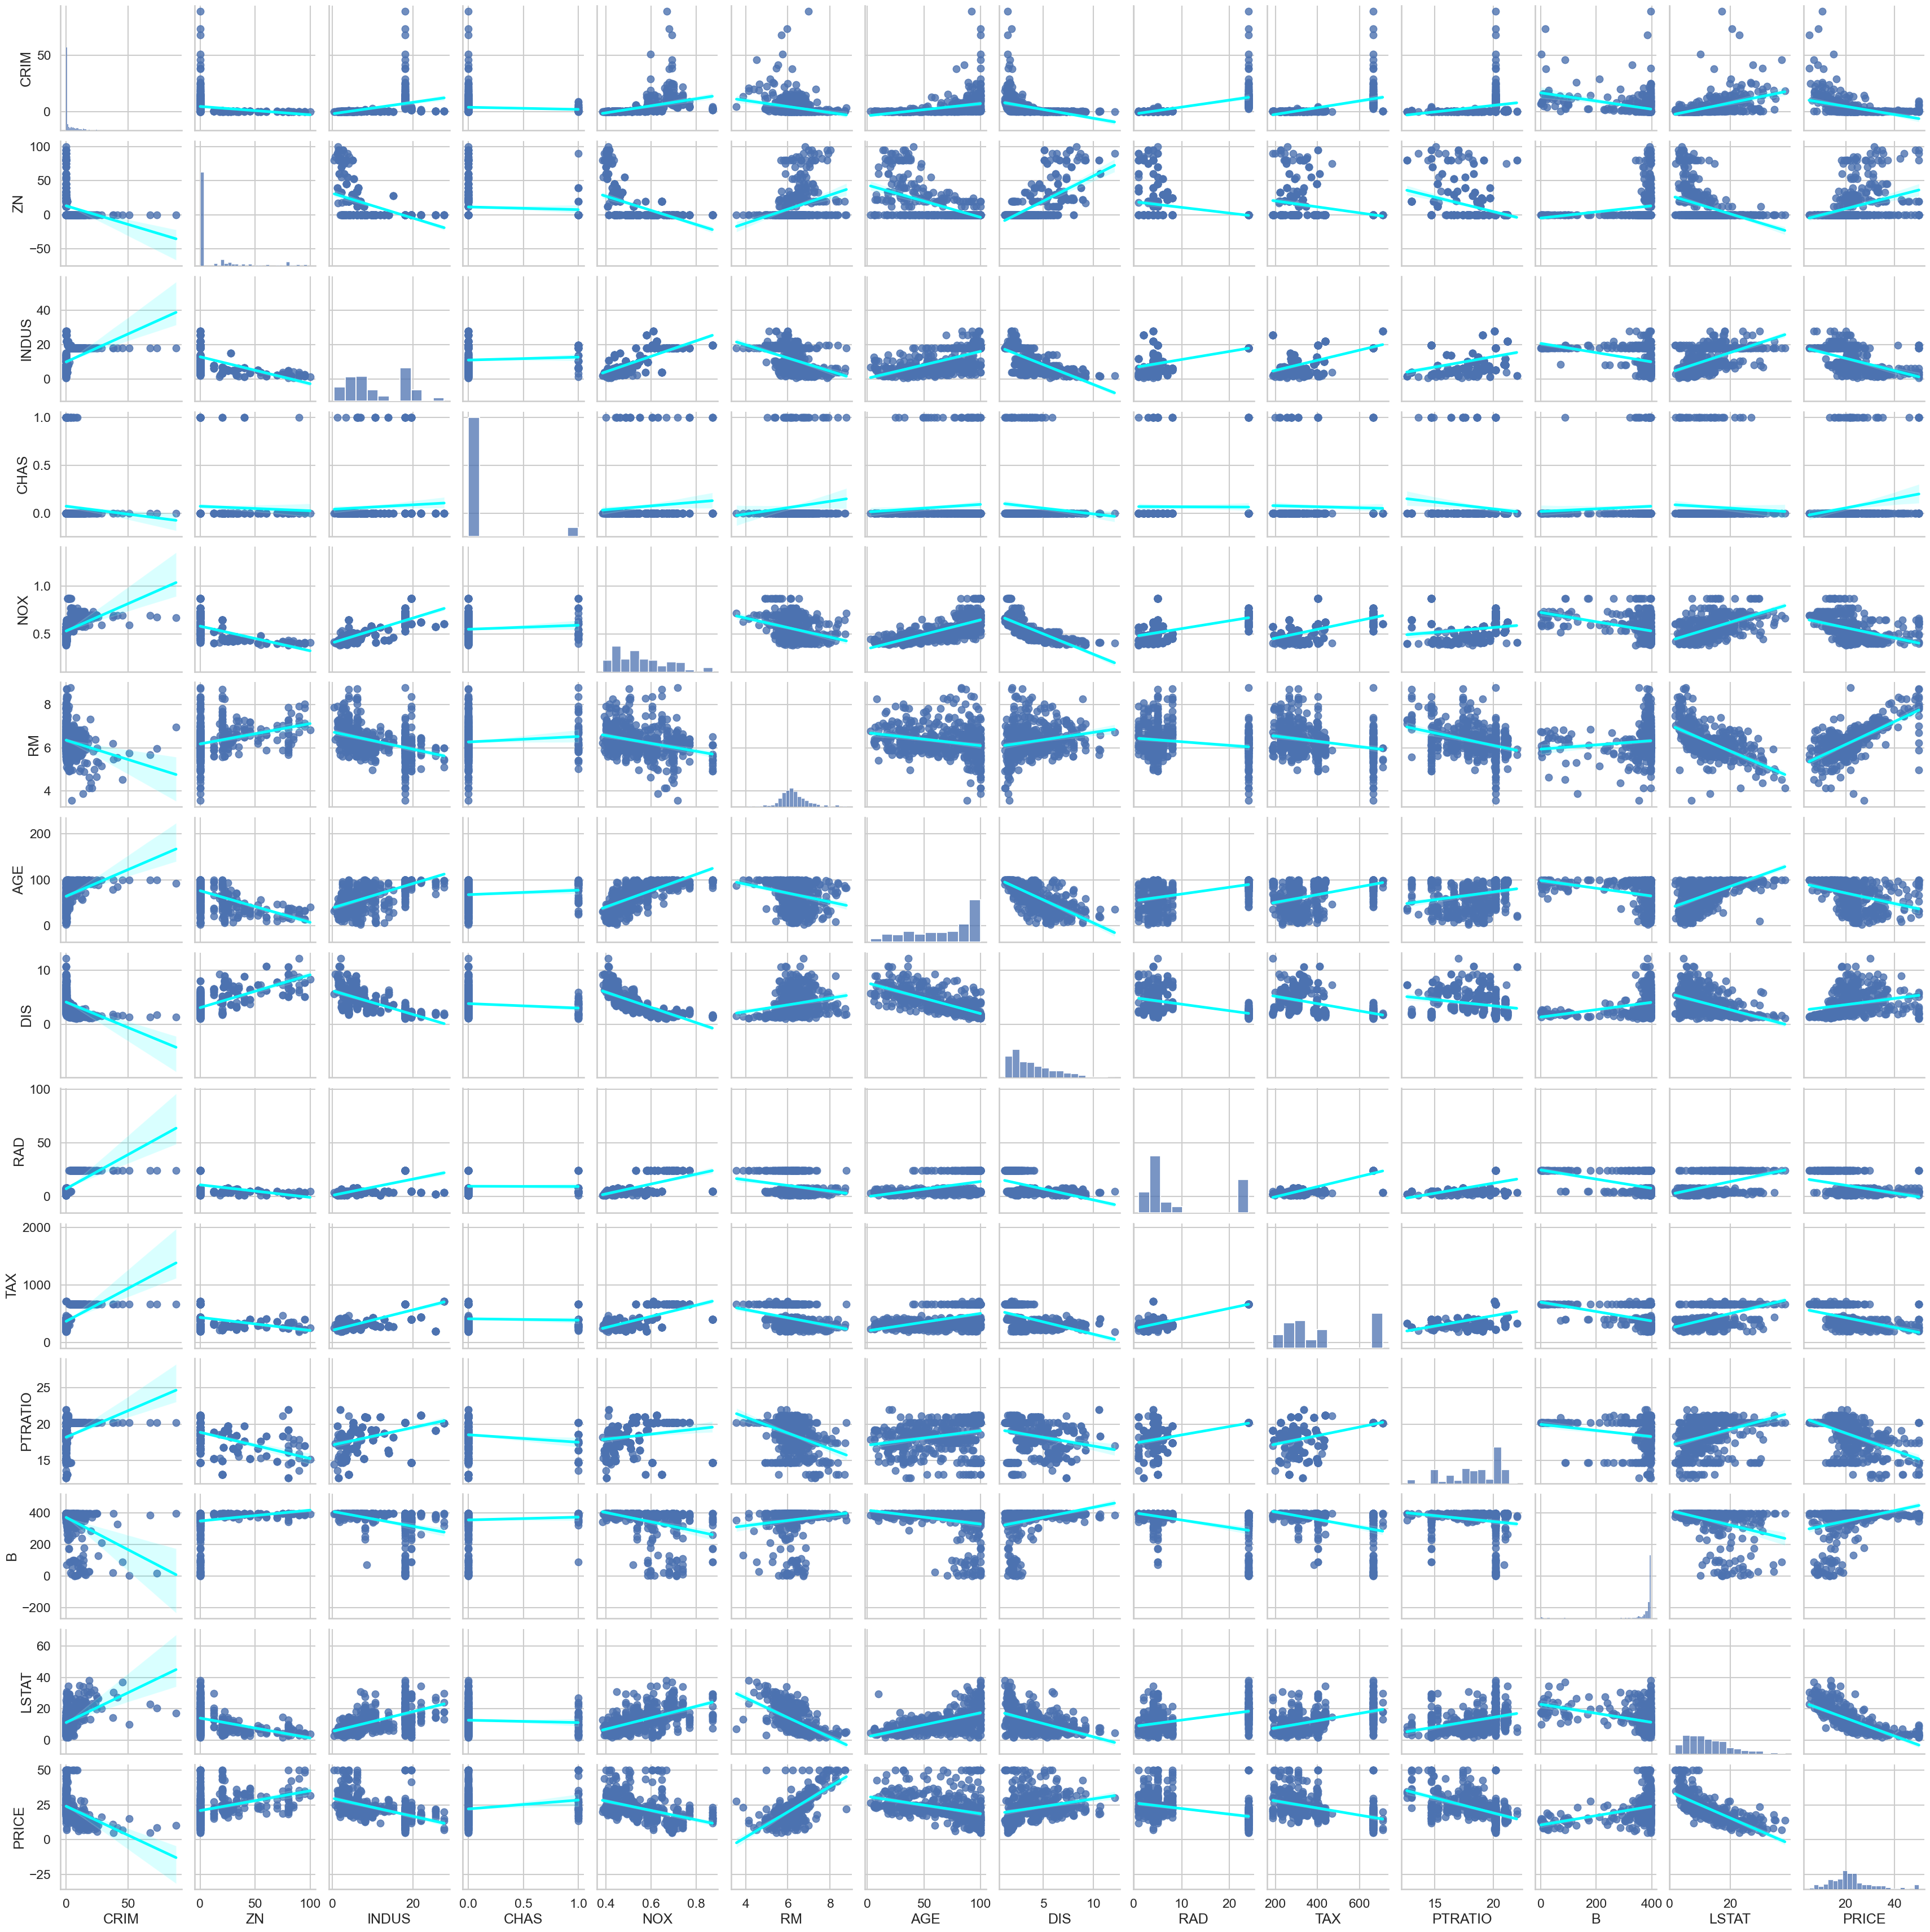

CPU times: total: 41.2 s
Wall time: 58.3 s


In [44]:
%%time
sns.pairplot(data, kind='reg',plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()
        

## Training and test dataset split

In [45]:
price = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    price, test_size=0.2, random_state=10)





C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


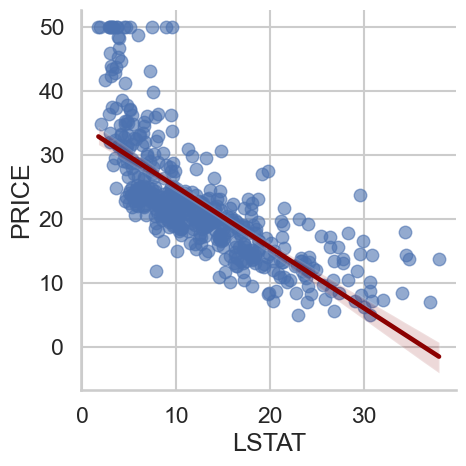

In [46]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

## Multivariable regression

In [47]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

print("Intercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

print('Training data r-squared: ',regr.score(X_train, Y_train) )
print('Test data r-squared : ', regr.score(X_test, Y_test))

Intercept 36.53305138282431
Training data r-squared:  0.750121534530608
Test data r-squared :  0.6709339839115631


## Data Tramsformation

In [48]:
data['PRICE'].skew()

1.1080984082549072

In [49]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [50]:
y_log.skew()

-0.33032129530987864

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


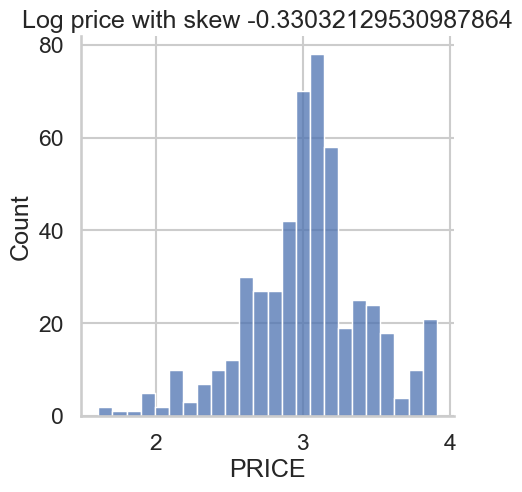

In [51]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


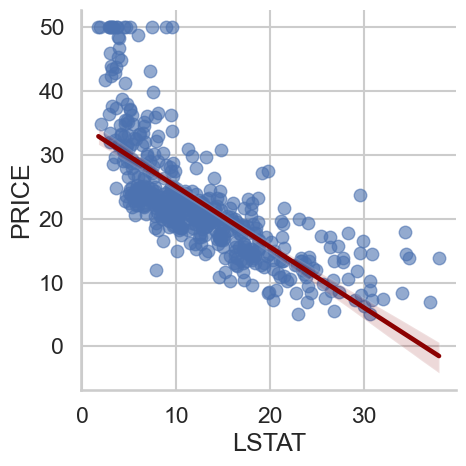

In [52]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

C:\Users\Rahul\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


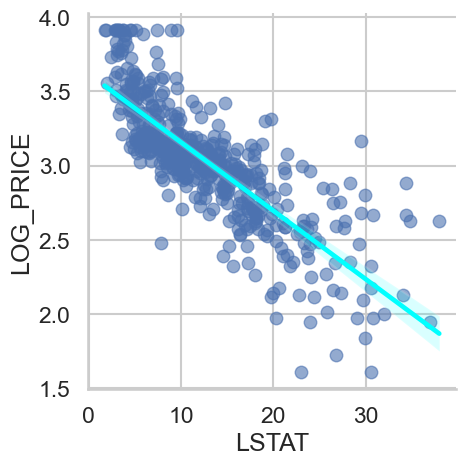

In [53]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log values

In [54]:
price = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    price, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, Y_train)

print("Intercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

print('Training data r-squared: ',regr.score(X_train, Y_train) )
print('Test data r-squared : ', regr.score(X_test, Y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 4.059943871775196
Training data r-squared:  0.7930234826697583
Test data r-squared :  0.7446922306260734
Intercept 4.059943871775196


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [55]:
np.e**0.08475

1.0884449214512975

## p values and evaluating coefficients

In [ ]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
# results.params
# resultls.pvalues
pd.DataFrame({'coef': results.params, 'pvalues':round(results.pvalues, 3)})

## Testing for Multicollinearity
$$TAX = \alpha_0+\alpha_1 RM+\alpha_2 NOX+...\alpha_{12}LSTAT$$
$$VIF_{TAX} = \frac{1}{1-R_{TAX} ^2)}$$

In [67]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [71]:
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [75]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=1))
print('All done')

1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
1.7145250443932485
All done


In [77]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=1))
print(vif)

[1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485, 1.7145250443932485]


In [81]:
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=1) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

coef_name   vif
0      const  1.71
1       CRIM  1.71
2         ZN  1.71
3      INDUS  1.71
4       CHAS  1.71
5        NOX  1.71
6         RM  1.71
7        AGE  1.71
8        DIS  1.71
9        RAD  1.71
10       TAX  1.71
11   PTRATIO  1.71
12         B  1.71
13     LSTAT  1.71

## Model simplification and the BIC

In [89]:
# original model with log prices and all features
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
# results.params
# resultls.pvalues
org_coef = pd.DataFrame({'coef': results.params, 'pvalues':round(results.pvalues, 3)})

print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697584


In [90]:
# original model with log prices and all features
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
# results.params
# resultls.pvalues
coef_minus_indus = pd.DataFrame({'coef': results.params, 'pvalues':round(results.pvalues, 3)})

print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [91]:
# original model with log prices and all features
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
# results.params
# resultls.pvalues
reduced_coef = pd.DataFrame({'coef': results.params, 'pvalues':round(results.pvalues, 3)})

print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -149.49934294224656
r-squared is 0.7918657661852815


In [92]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  pvalues      coef  pvalues      coef  pvalues
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and Residual Plots

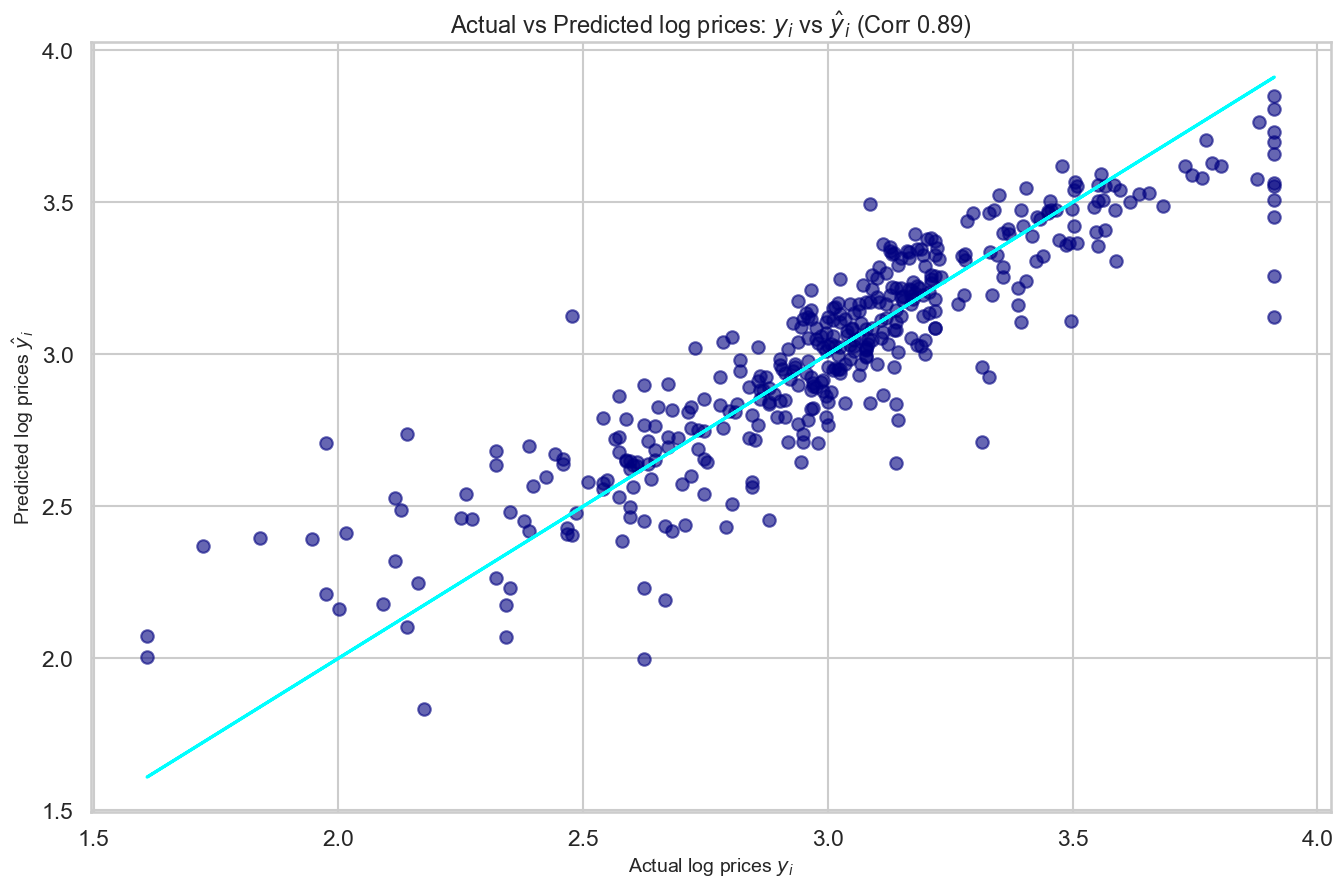

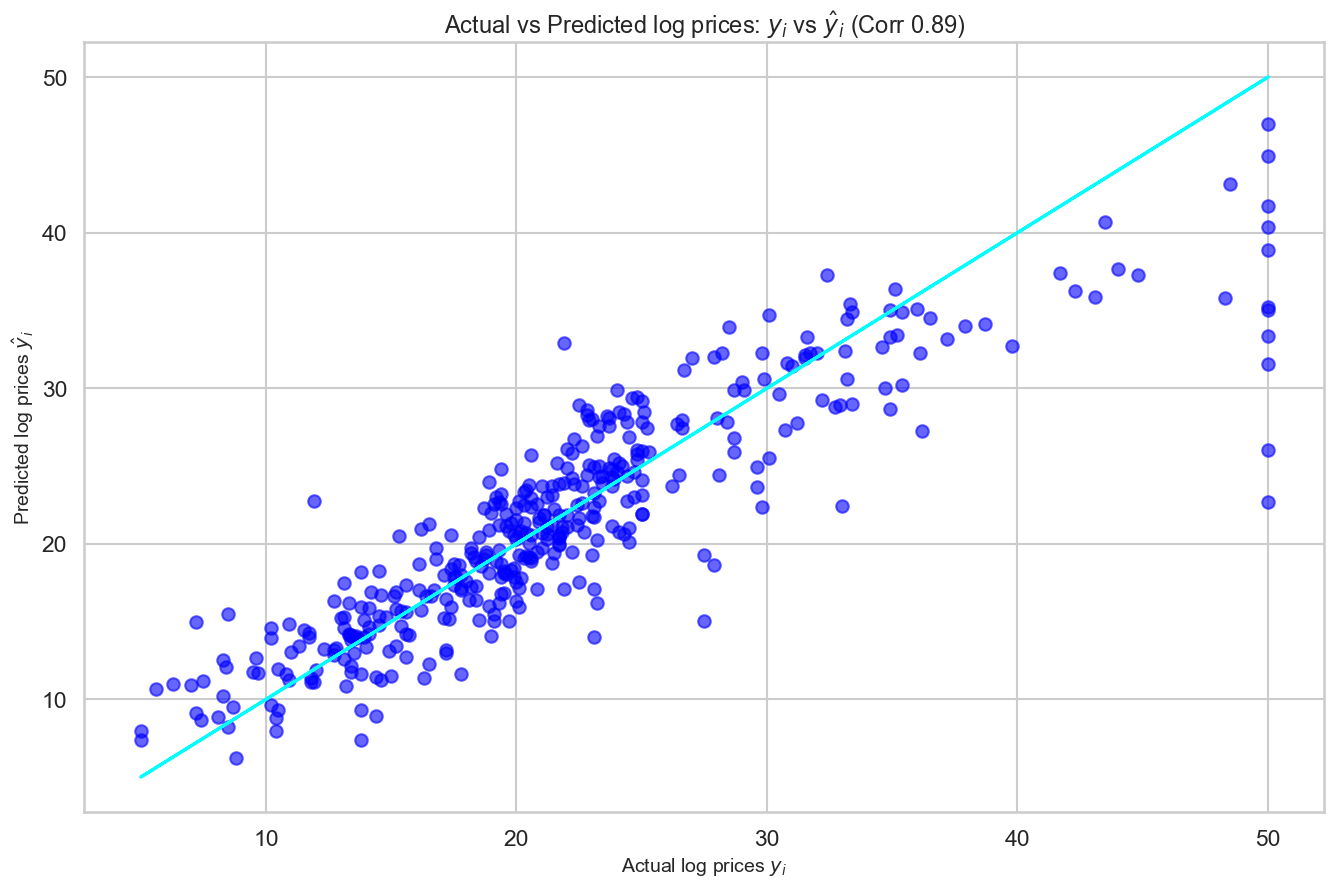

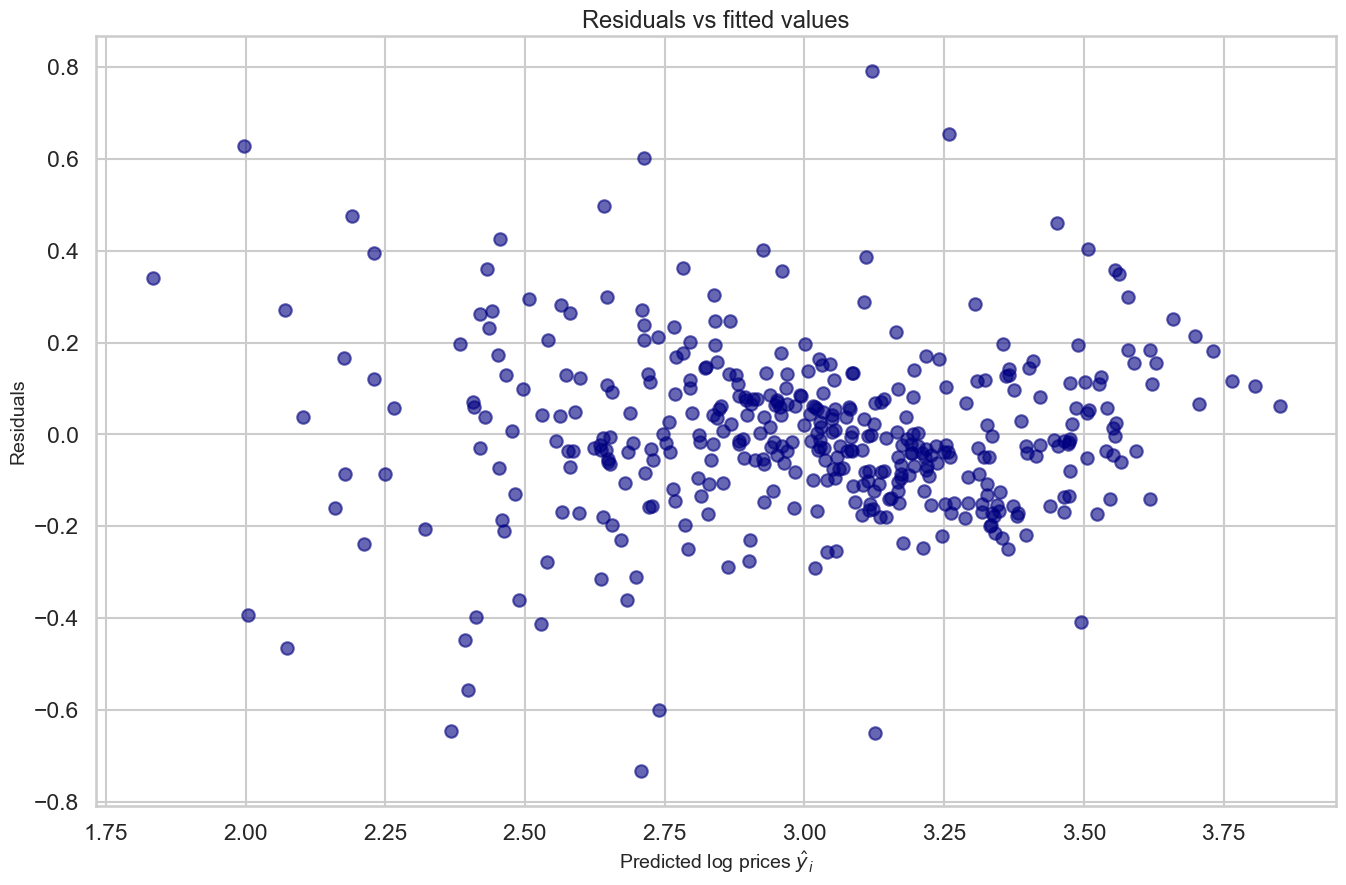

In [137]:
price = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS', 'AGE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    price, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

residuals = Y_train - results.fittedvalues

corr =round( Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=Y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

plt.figure(figsize=(16,10))

plt.scatter(x=np.e**Y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**Y_train, np.e**Y_train, color='cyan')
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

#residuals vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs fitted values', fontsize=17)
plt.show()

#MEAN SQUARED ERROR
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8376\4113651509.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='navy')


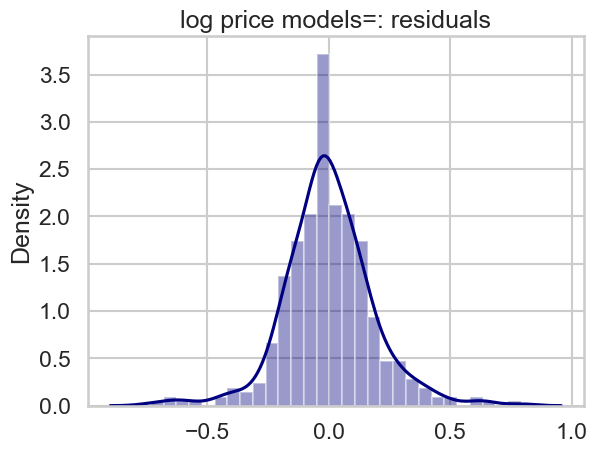

In [138]:
#Distribution of residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='navy')
plt.title('log price models=: residuals')
plt.show()

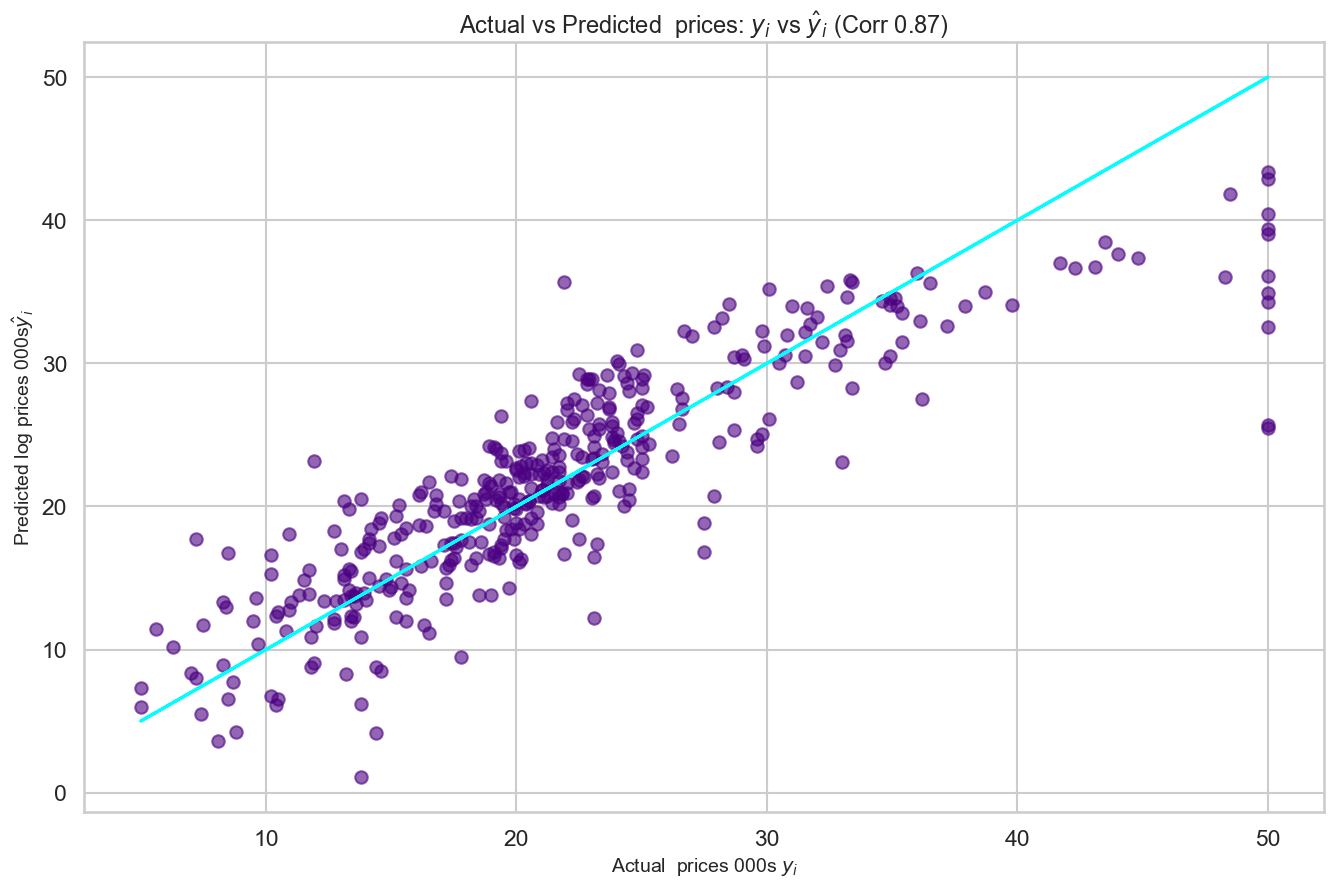

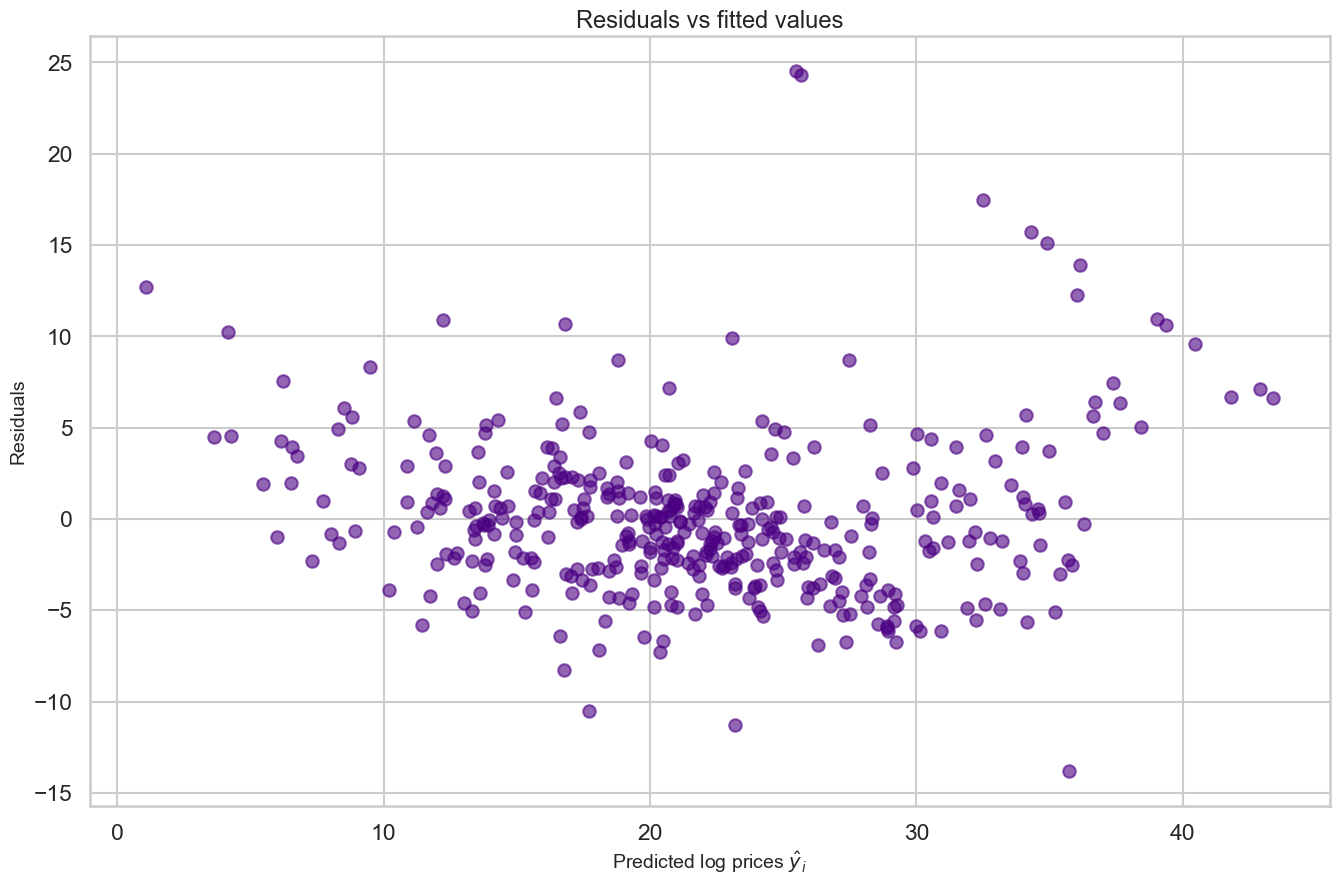

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8376\143896294.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='indigo')


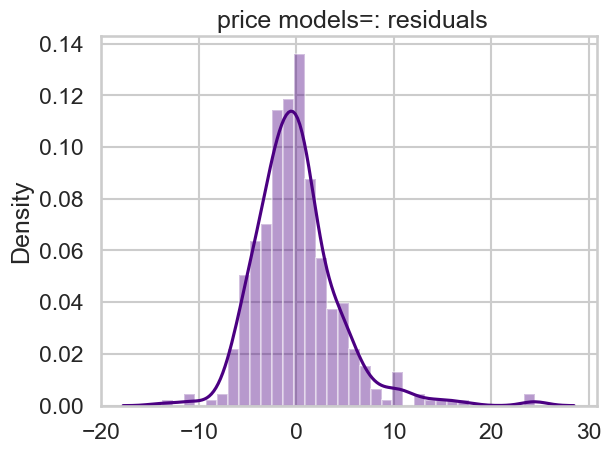

In [139]:
price = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    price, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

residuals = Y_train - results.fittedvalues

corr =round( Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=Y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')
plt.xlabel('Actual  prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted log prices 000s$\hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted  prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()



#residuals vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs fitted values', fontsize=17)
plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='indigo')
plt.title(' price models=: residuals')
plt.show()
#MEAN SQUARED ERROR
normal_mse = round(results.mse_resid, 3)
normal_rsquared = round(results.rsquared, 3)

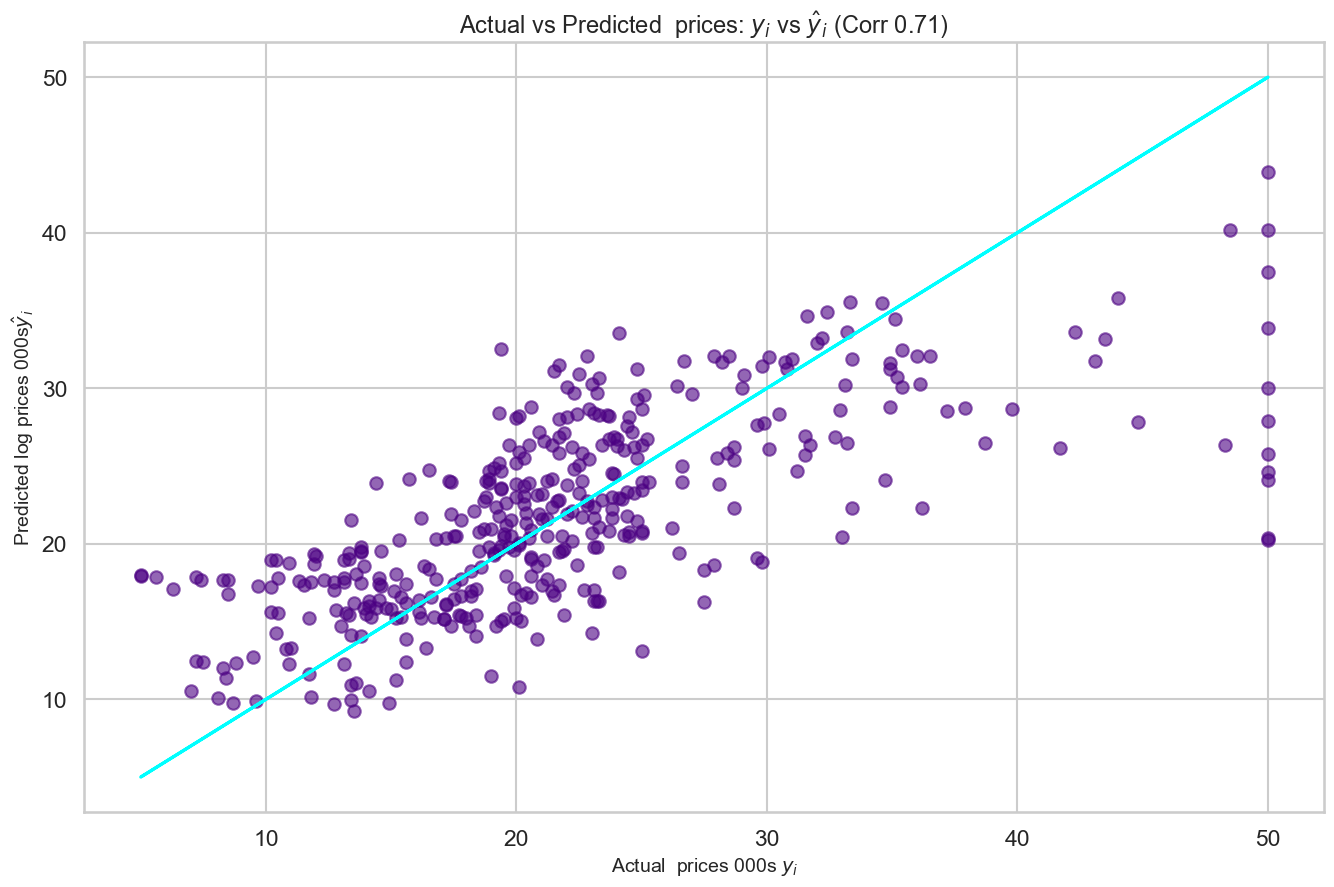

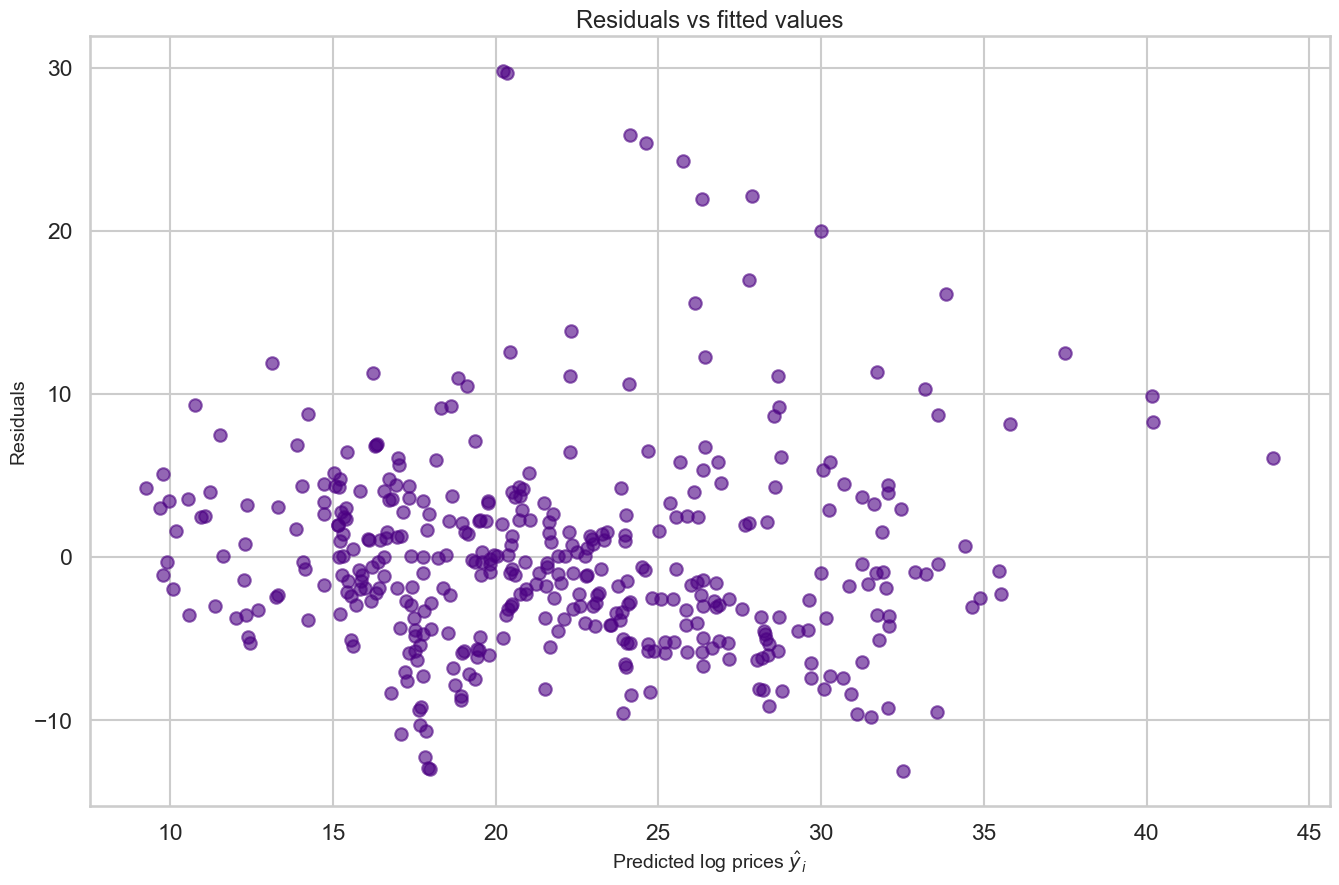

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8376\65443865.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='indigo')


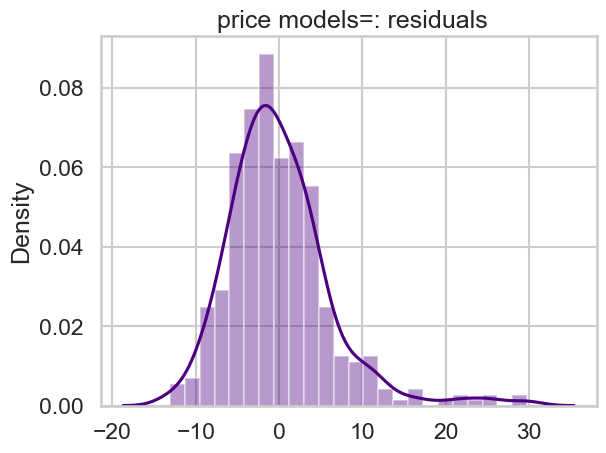

In [144]:
price = data['PRICE']
features = data.drop(['PRICE', 'INDUS','AGE', 'LSTAT', 'RM', 'CRIM'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    price, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

residuals = Y_train - results.fittedvalues

corr =round( Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(16,10))

plt.scatter(x=Y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(Y_train, Y_train, color='cyan')
plt.xlabel('Actual  prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted log prices 000s$\hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted  prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()



#residuals vs predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs fitted values', fontsize=17)
plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='indigo')
plt.title(' price models=: residuals')
plt.show()

#MEAN SQUARED ERROR
omitted_mse = round(results.mse_resid, 3)
omitted_rsquared = round(results.rsquared, 3)



In [152]:
pd.DataFrame({'R-squared': [reduced_log_rsquared, normal_rsquared, omitted_rsquared],
             'MSE':[reduced_log_mse, normal_mse, omitted_mse],
             'RMSE': np.sqrt([reduced_log_mse, normal_mse, omitted_mse])},
            index=['Reduced log model', 'Normal model', 'Omitted model'])

R-squared     MSE      RMSE
Reduced log model      0.792   0.035  0.187083
Normal model           0.750  19.921  4.463295
Omitted model          0.499  39.438  6.279968

In [156]:
print('1 s.d. in log prices is',np.sqrt(reduced_log_mse) )
print('2 s.d. in log prices is',2*np.sqrt(reduced_log_mse) )
upper_bound = np.log(30)+2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $ ',np.e**upper_bound*1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $  43613.34233239937


In [157]:
lower_bound = np.log(30)-2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $ ',np.e**lower_bound*1000)

The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $  20635.886906824155
